In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,KFold
from tqdm import tqdm
from matplotlib.colors import ListedColormap

In [25]:
# generate samples 
sample_size = 1000
half = int(sample_size/2)
x = np.concatenate((np.random.randn(half,2),2+np.random.randn(half,2)),axis = 0) +4
y= np.array([0] *half + [1] * half)


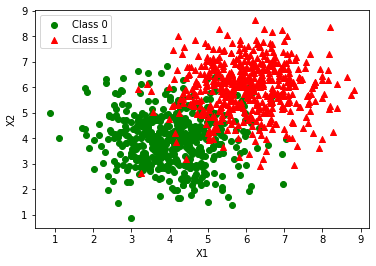

In [27]:
# visulize samples
plt.figure()

plt.scatter(x[0:half,0],x[0:half,1],marker='o',c='g',label = "Class 0")
plt.scatter(x[half:,0],x[half:,1],marker='^',c='r',label = "Class 1")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper left')

plt.show()

In [4]:

# training
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state = 22)

model = svm.SVC(C=10**10)
model.fit(x_train,y_train)




SVC(C=10000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

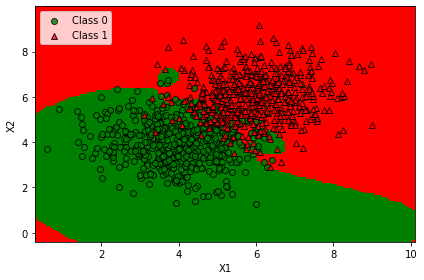

In [30]:
# visualize decision boundary to see over fitting
x,y = np.vstack((x_train,x_test)),np.hstack((y_train,y_test))
x1_min,x1_max = x[:,0].min()-1,x[:,0].max()+1
x2_min,x2_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x1_min,x1_max,0.08),np.arange(x2_min,x2_max,0.08))
y_pre = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
colors = ('green','red')
plt.pcolormesh(xx,yy,y_pre,cmap= ListedColormap(colors))

plt.scatter(x[y==0,1],x[y==0,0],c=colors[0],cmap=plt.cm.Paired, edgecolors='k',marker="o",label="Class 0",alpha=0.8)
plt.scatter(x[y==1,1],x[y==1,0],c=colors[1],cmap=plt.cm.Paired, edgecolors='k',marker= "^",label="Class 1",alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()